In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('ghg-emissions_clean.csv')
df_oldtemp = pd.read_csv('old_temp.csv')
df_oldprec = pd.read_csv('old_prec.csv')
df_newtemp = pd.read_csv('prediction_temp.csv')
df_newprec = pd.read_csv('prediction_prec.csv')

In [4]:
# acortamos el dataframe (df) para estudiar solo nuestros paises de interes (USA, Gernamy, China, UK, India y Rusia)

In [34]:
df_acortado = df[(df['Country/Region']=='United States') | (df['Country/Region'] == 'Russia') | (df['Country/Region'] == 'United Kingdom') | (df['Country/Region'] == 'India') | (df['Country/Region'] == 'Germany') | (df['Country/Region'] == 'China')]

In [42]:
df_acortado

,Unnamed: 0,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,China,MtCO2e,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,...,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,1,United States,MtCO2e,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,...,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,2,India,MtCO2e,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,...,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,3,Russia,MtCO2e,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,...,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
8,8,Germany,MtCO2e,1109.28,1079.69,1032.01,1024.31,1011.41,1004.79,1032.92,...,832.31,862.97,823.34,837.46,854.70,814.43,818.22,820.70,803.18,776.61
17,17,United Kingdom,MtCO2e,746.40,761.64,739.51,722.61,711.75,702.55,722.68,...,570.73,583.60,540.98,562.45,543.71,502.84,486.78,464.28,450.24,441.13


In [43]:
# como en este dataframe no tenemos años futuros, obviamente. Vamos a quidarnos con tan solo los años que nos 
# interesan que tenemos en los dataframes de las llamadas a la API, estos son 1980 hasta 1999, ya que este 
# dataframe empieza en 1990, cogeremos desde el 1990 hasta el 1999

In [51]:
columnas_interesantes = ['Country/Region', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']
df_acortado_date = df_acortado[columnas_interesantes]
df_acortado_date

,Country/Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,China,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,4103.23,4053.37
1,United States,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,6293.80,6291.25
2,India,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,1382.26,1460.24
3,Russia,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,1740.23,1772.68
8,Germany,1109.28,1079.69,1032.01,1024.31,1011.41,1004.79,1032.92,994.92,968.60,934.16
17,United Kingdom,746.40,761.64,739.51,722.61,711.75,702.55,722.68,701.07,697.42,671.25


In [109]:
# convertimos los valores de cada año en float, ya que eran object

In [110]:
pd.to_numeric(df_acortado_date['1990'])
pd.to_numeric(df_acortado_date['1991'])
pd.to_numeric(df_acortado_date['1992'])
pd.to_numeric(df_acortado_date['1993'])
pd.to_numeric(df_acortado_date['1994'])
pd.to_numeric(df_acortado_date['1995'])
pd.to_numeric(df_acortado_date['1996'])
pd.to_numeric(df_acortado_date['1997'])
pd.to_numeric(df_acortado_date['1998'])
pd.to_numeric(df_acortado_date['1999'])

0     4053.37
1     6291.25
2     1460.24
3     1772.68
8      934.16
17     671.25
Name: 1999, dtype: float64

In [127]:
años_prueba = ['Country/Region', '1994', '1995','1996', '1997', '1998', '1999']
df_acortado_date_2 = df_acortado_date[años_prueba]
df_acortado_date_2

,Country/Region,1994,1995,1996,1997,1998,1999
0,China,3528.81,3918.30,3954.75,3963.61,4103.23,4053.37
1,United States,5782.20,5843.90,6010.62,6258.47,6293.80,6291.25
2,India,1174.78,1240.44,1289.63,1348.09,1382.26,1460.24
3,Russia,2011.47,1930.88,1889.18,1755.59,1740.23,1772.68
8,Germany,1011.41,1004.79,1032.92,994.92,968.60,934.16
17,United Kingdom,711.75,702.55,722.68,701.07,697.42,671.25


In [132]:
# he hecho esto porque para hacer la traspuesta, necesito nrows=ncolumns y no era asi el caso
# aun quitando 3 años nos vamos a poder hacer a la idea de la tendencia de estos datos

In [140]:
df_acortado_date_2_t = df_acortado_date_2.T
df_acortado_date_2_t.reset_index()

,index,0,1,2,3,8,17
0,Country/Region,China,United States,India,Russia,Germany,United Kingdom
1,1994,3528.81,5782.2,1174.78,2011.47,1011.41,711.75
2,1995,3918.3,5843.9,1240.44,1930.88,1004.79,702.55
3,1996,3954.75,6010.62,1289.63,1889.18,1032.92,722.68
4,1997,3963.61,6258.47,1348.09,1755.59,994.92,701.07
5,1998,4103.23,6293.8,1382.26,1740.23,968.6,697.42
6,1999,4053.37,6291.25,1460.24,1772.68,934.16,671.25


### VISUALES

In [64]:
df_oldtemp

,Unnamed: 0,Annual_Data,Country
0,0,6.344341,USA
1,1,7.677910,Germany
2,2,4.626097,China
3,3,9.121408,UK
4,4,21.990156,India
5,5,-7.352788,Rusia


In [67]:
df_oldprec

,Unnamed: 0,Annual_Data,Country
0,0,841.912621,USA
1,1,929.598637,Germany
2,2,808.955153,China
3,3,988.845497,UK
4,4,1018.582287,India
5,5,497.024078,Rusia


In [71]:
df_newtemp

,Unnamed: 0,Annual_Data,Country
0,0,7.483289,USA
1,1,8.535085,Germany
2,2,5.728654,China
3,3,9.668244,UK
4,4,22.846838,India
5,5,-5.949377,Rusia


In [73]:
df_newprec

,Unnamed: 0,Annual_Data,Country
0,0,859.000935,USA
1,1,949.684790,Germany
2,2,817.829902,China
3,3,1005.959857,UK
4,4,1018.861217,India
5,5,520.475287,Rusia


"\nax[0,0].title.set_tex('Temp. from 1980 to 1999')\nax[0,1].title.set_tex('Temp. prediction in 2039')\nax[1,0].title.set_text('Prec. from 1980 to 1999')\nax[1,1].title.set_text('Prec. prediction in 2039')\nax[2,0].title.set_tex('Temp. from 1980 to 1999')\nax[2,1].title.set_tex('Temp. prediction in 2039')\nax[3,0].title.set_text('Prec. from 1980 to 1999')\nax[3,1].title.set_text('Prec. prediction in 2039');\n"

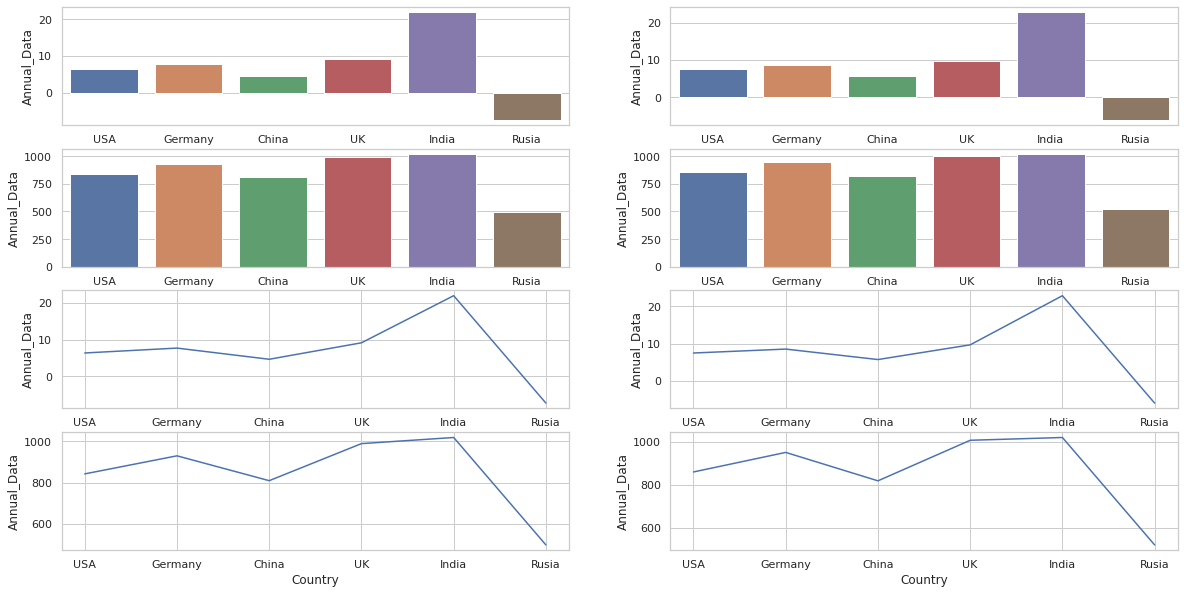

In [98]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,10))
sns.barplot(x=df_oldtemp['Country'], y=df_oldtemp['Annual_Data'], ax=ax[0,0])
sns.barplot(x=df_newtemp['Country'], y=df_newtemp['Annual_Data'], ax=ax[0,1])
sns.barplot(x=df_oldprec['Country'], y=df_oldprec['Annual_Data'], ax=ax[1,0])
sns.barplot(x=df_newprec['Country'], y=df_newprec['Annual_Data'], ax=ax[1,1])
sns.lineplot(x=df_oldtemp['Country'], y=df_oldtemp['Annual_Data'], ax=ax[2,0])
sns.lineplot(x=df_newtemp['Country'], y=df_newtemp['Annual_Data'], ax=ax[2,1])
sns.lineplot(x=df_oldprec['Country'], y=df_oldprec['Annual_Data'], ax=ax[3,0])
sns.lineplot(x=df_newprec['Country'], y=df_newprec['Annual_Data'], ax=ax[3,1])

# le pongo titulos a cada plot
'''
ax[0,0].title.set_tex('Temp. from 1980 to 1999')
ax[0,1].title.set_tex('Temp. prediction in 2039')
ax[1,0].title.set_text('Prec. from 1980 to 1999')
ax[1,1].title.set_text('Prec. prediction in 2039')
ax[2,0].title.set_tex('Temp. from 1980 to 1999')
ax[2,1].title.set_tex('Temp. prediction in 2039')
ax[3,0].title.set_text('Prec. from 1980 to 1999')
ax[3,1].title.set_text('Prec. prediction in 2039');
'''

In [111]:
# ya que no se distinguen muy bien las diferencias, a no ser que se miro muy fijamente, vamos a juntar 
# los datos de las precipitaciones y temperaturas y luego represenatrlos

In [112]:
df_oldtemp['Pred_Data'] = df_newtemp['Annual_Data']

In [113]:
df_oldtemp

,Unnamed: 0,Annual_Data,Country,Pred_Data
0,0,6.344341,USA,7.483289
1,1,7.677910,Germany,8.535085
2,2,4.626097,China,5.728654
3,3,9.121408,UK,9.668244
4,4,21.990156,India,22.846838
5,5,-7.352788,Rusia,-5.949377


In [114]:
df_oldprec['Pred_Data'] = df_newprec['Annual_Data']

In [115]:
df_oldprec

,Unnamed: 0,Annual_Data,Country,Pred_Data
0,0,841.912621,USA,859.000935
1,1,929.598637,Germany,949.684790
2,2,808.955153,China,817.829902
3,3,988.845497,UK,1005.959857
4,4,1018.582287,India,1018.861217
5,5,497.024078,Rusia,520.475287


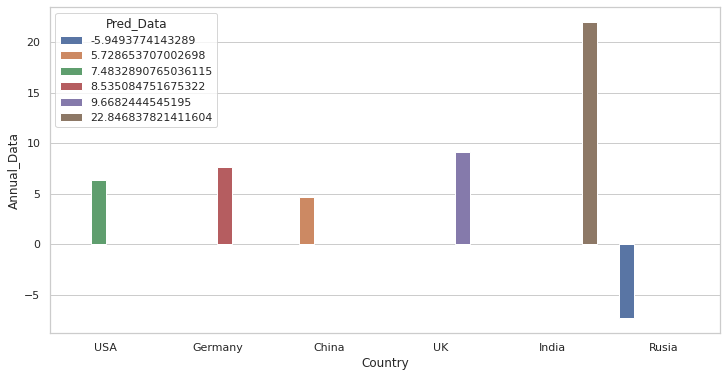

In [144]:
sns.barplot(data=df_oldtemp , x='Country', y='Annual_Data', hue='Pred_Data');

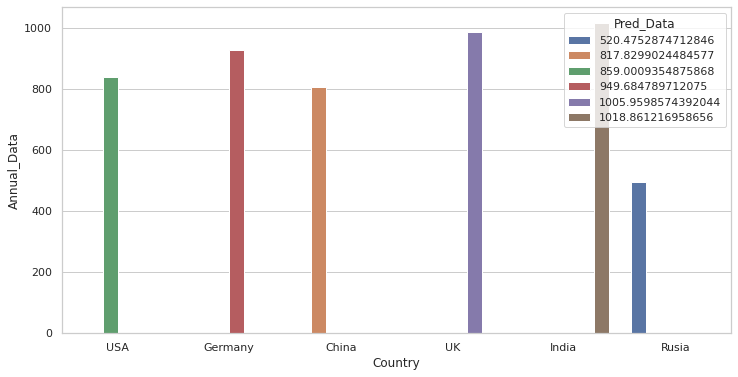

In [143]:
sns.barplot(data=df_oldprec , x='Country', y='Annual_Data', hue='Pred_Data');